In [11]:
#Imports
from matplotlib import pyplot as plt
import time
import numpy
from zmqRemoteApi import RemoteAPIClient

In [39]:
client = RemoteAPIClient()
sim = client.getObject('sim')
client.setStepping(True)
bill = sim.getObject('./Bill/Bill')
robot = sim.getObject('./Omnirob')

In [40]:
timestamps = []
resultData = []
sim.startSimulation()
while (t := sim.getSimulationTime()) < 30:
    s = f'Simulation time: {t:.2f} [s]'
    pos1 = sim.getObjectPosition(bill,sim.handle_world)
    pos2 = sim.getObjectPosition(robot,sim.handle_world)
    dist = numpy.linalg.norm(numpy.subtract(pos1,pos2))
    resultData.append(dist)
    timestamps.append(t)
    client.step()
sim.stopSimulation()

1

Text(0.5, 1.0, 'Line')

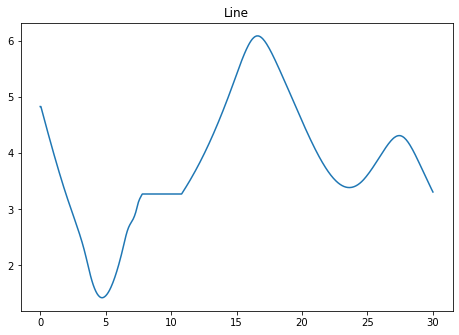

In [41]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(timestamps, resultData)
ax.set_title("Line")